In [1]:
# Modules
import numpy as np
import matplotlib.pyplot as plt # for plotting
import astropy.units as u # manages units
from scipy import integrate
from scipy.special import lambertw # Lambert W function
from scipy.optimize import brentq

In [2]:
# Constants
from astropy.constants import M_sun, R as R_gas, G, m_p, h
k = 1e-2 * u.cm**2/u.g
alpha_B = 2.6e-13 * (u.cm **3)/u.s # cm3s-1 at (T = 10^4 K) From Owen and Alvarez 2016

#### To do:

- Guess ionization front position

- Calculate density step at ionisation front (by balancing pressure)

- Combine into full density profile (steady parker wind density profile for r > R_IF, hydrostatic density profile for r < R_IF)

- Proceed to calculate ionisation fraction step by step (from other notebook)

## Density profile in isothermal hydrostatic equilibrium:
$$ \rho(r) = \rho_s e^{2\frac{r_c}{r} - 2\frac{r_c}{r_s}}$$
with $$ r_c = \frac{GM_*\mu}{2RT} = \frac{GM_*}{2{c_s}^2} $$
$G$ gravitational constant,
$M_*$ Mass of the star,
$R$ ideal gas constant,
$T$ Temperature (constant),
$r_c$ parker wind critical radius,
$r_s$ radius of the star (at the photosphere),
$\rho_s$ density of star at the photosphere (known)


In [3]:
def density_hydrostatic(R, R_c, R_s, rho_s):
  """ Find density profile in hydrostatic isothermal equilibrium.  The temperature dependence is encoded in
   the value of r_c, which is calculated from the speed of sound in the hydrostatic region.

    Parameters
    ----------
    R : float
        Radial distance
    R_c : float
        Parker wind critical radius
    R_s: float
        Radius of star (photospere)
    rho_s: float
        Density at the photosphere of the star

    Returns
    -------
    float
        Density at radius R for a star in hydrostatic equilibrium with density rho_s at radius R_s.
    """
  arg = 1/R - 1/R_s
  return rho_s*np.exp(2*R_c*arg)
    

## Mach number of steady parker wind as function of radius

$$ M(r) = \sqrt{-W[-\frac{r_c^4}{r^4} e^{3 - 4 \frac{r_c}{r}}]}$$

Where $M = v/a$, $v$ is the flow velocity (constant in time for steady flow, function of r) and $c_s$ is the speed of sound

nan


/Users/jacopouggeri/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/b_/4vdzp0yn5_n0jlzmh1wmgmkc0000gn/T/ipykernel_16012/1593748343.py:6: RuntimeWarning: invalid value encountered in square
  print(np.sum(np.imag(lambertw(x, -1)**2))) # test if there is any imaginary component


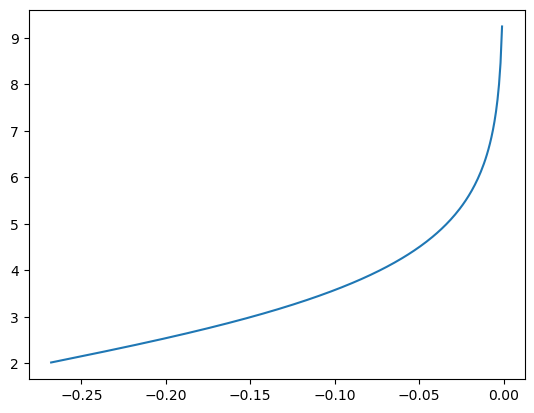

In [4]:
# Test lambertw function: which branch should be taken? argument of square root must always be positive for r > r_c

x = np.linspace(-np.exp(-1)+1e-1, 0, 300)
plt.plot(x, -lambertw(x, -1))

print(np.sum(np.imag(lambertw(x, -1)**2))) # test if there is any imaginary component

In [5]:
def mach_parker(R, R_c):
    """ Find mach number of steady parker wind at radius R and critical radius R_c

    Parameters
    ----------
    R : float
        Radial distance at which the mach number is to be found
    R_c : float
        Parker wind critical radius

    Returns
    -------
    float
        Mach number (v/c_s) at radius R. Adimensional.
    """
    R = R.to("astronomical_unit").value
    R_c = R_c.to("astronomical_unit").value
    ratio = R_c/R
    arg = -(ratio)**4 * np.exp(3 - 4*ratio)
    return np.sqrt(-np.real(lambertw(arg)))

Text(0, 0.5, 'M^2')

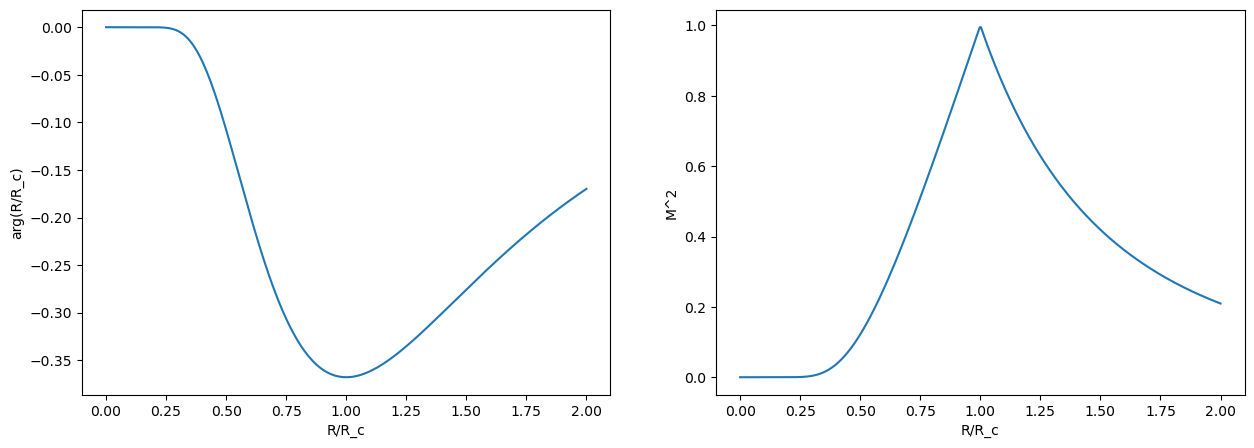

In [6]:
# Test mach_parker function

def mach_parker_squared(R, R_c):
    """ Find mach number squared of steady parker wind at radius R and critical radius R_c

    Parameters
    ----------
    R : float
        Radial distance at which the mach number is to be found
    R_c : float
        Parker wind critical radius

    Returns
    -------
    float
        Mach number (v/c_s) squared at radius R. Adimensional.
    """
    R = R.to("astronomical_unit").value
    R_c = R_c.to("astronomical_unit").value
    ratio = R_c/R
    arg = -(ratio)**4 * np.exp(3 - 4*ratio)
    return -lambertw(arg)

def mach_parker_arg(R, R_c):
    """ Find argument of lambertw function in expression for mach number of steady parker wind at radius R and critical radius R_c

    Parameters
    ----------
    R : float
        Radial distance at which the mach number is to be found
    R_c : float
        Parker wind critical radius

    Returns
    -------
    float
        Argument of lambertw in mach number expression. Adimensional.
    """
    R = R.to("astronomical_unit").value
    R_c = R_c.to("astronomical_unit").value
    ratio = R_c/R
    arg = -(ratio)**4 * np.exp(3 - 4*ratio)
    return arg

x = np.linspace(1e-10, 1, 400) * u.astronomical_unit
x_c = 0.5 * u.astronomical_unit

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(x/x_c, mach_parker_arg(x, x_c))
plt.xlabel("R/R_c")
plt.ylabel("arg(R/R_c)")

plt.subplot(122)
plt.plot(x/x_c, mach_parker_squared(x, x_c))
plt.xlabel("R/R_c")
plt.ylabel("M^2")

/var/folders/b_/4vdzp0yn5_n0jlzmh1wmgmkc0000gn/T/ipykernel_16012/1605185569.py:20: RuntimeWarning: invalid value encountered in multiply
  return -lambertw(arg, 0)*np.heaviside(ratio - 1, 1) -lambertw(arg, -1)*np.heaviside(1-ratio, 1)


Text(0, 0.5, 'M^2')

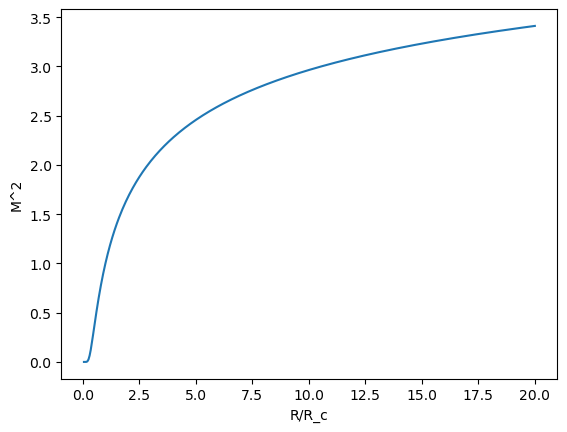

In [7]:
# Test mach_parker function

def mach_parker_squared(R, R_c):
    """ Find mach number squared of steady parker wind at radius R and critical radius R_c

    Parameters
    ----------
    R : float
        Radial distance at which the mach number is to be found
    R_c : float
        Parker wind critical radius

    Returns
    -------
    float
        Mach number (v/c_s) squared at radius R. Adimensional.
    """
    ratio = R_c/R
    arg = -(ratio)**4 * np.exp(3 - 4*ratio)
    return -lambertw(arg, 0)*np.heaviside(ratio - 1, 1) -lambertw(arg, -1)*np.heaviside(1-ratio, 1)

x = (np.linspace(1e-10, 10, 400) * u.astronomical_unit).value
x_c = (0.5 * u.astronomical_unit).value

plt.plot(x/x_c, np.sqrt(mach_parker_squared(x, x_c)))
plt.xlabel("R/R_c")
plt.ylabel("M^2")

In [9]:
def mach_parker(R, R_c):
    """ Find mach number of steady parker wind at radius R and critical radius R_c

    Parameters
    ----------
    R : float
        Radial distance at which the mach number is to be found
    R_c : float
        Parker wind critical radius

    Returns
    -------
    float
        Mach number (v/c_s) at radius R. Adimensional.
    """
    R = R.to("astronomical_unit").value
    R_c = R_c.to("astronomical_unit").value
    ratio = R_c/R
    arg = -(ratio)**4 * np.exp(3 - 4*ratio)
    return np.sqrt(np.real(-lambertw(arg, 0)))*np.heaviside(ratio - 1, 1) + np.sqrt(np.real(-lambertw(arg, -1)))*np.heaviside(1-ratio, 1)

/var/folders/b_/4vdzp0yn5_n0jlzmh1wmgmkc0000gn/T/ipykernel_13408/2713561506.py:20: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(np.real(-lambertw(arg, 0)))*np.heaviside(ratio - 1, 1) + np.sqrt(np.real(-lambertw(arg, -1)))*np.heaviside(1-ratio, 1)


Text(0, 0.5, 'M')

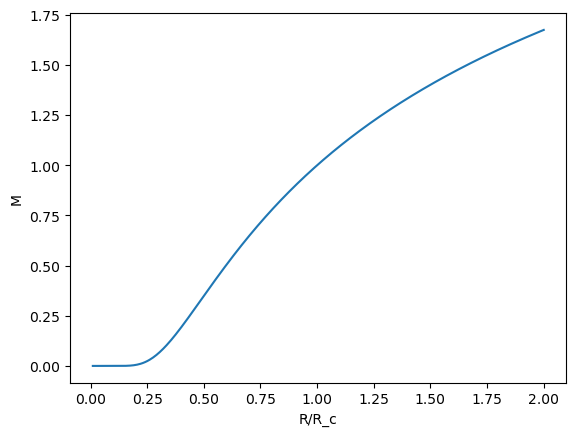

In [10]:
x = (np.linspace(1e-10, 1, 400) * u.astronomical_unit)
x_c = (0.5 * u.astronomical_unit)

plt.plot(x/x_c, mach_parker(x, x_c))
plt.xlabel("R/R_c")
plt.ylabel("M")

## Density profile from steady parker wind

Using mass conservation $\dot M = 4 \pi r^2 \rho(r) v(r)$

obtain $r^2 \rho(r) v(r) = r_c^2 \rho(r_c) v(r_c) $

recall $v(r_c) = a$ so:
$$\rho(r) = \frac{r_c^2}{r^2}\frac{\rho(r_c)}{M(r)}$$

If the density at some other radius, say the ionisation front $r_I$, is known, then:
$$\rho(r_I) = \frac{r_c^2}{r_I^2}\frac{\rho(r_c)}{M(r_I)}$$
so we can rewrite:
$$\rho(r) = \frac{r_I^2}{r^2}\frac{M(r_I)}{M(r)}\rho(r_I)$$

In [11]:
def density_parker(R, R_c, rho_c):
    """ Density profile with radial distance for steady parker wind

    Parameters
    ----------
    R : float
        Radial distance
    R_c : float
        Parker wind critical radius
    rho_c : float
        Density at the critical radius

    Returns
    -------
    float
       The density as a function of the radial distance R for a steady parker wind solution.
    """
    M = mach_parker(R, R_c)
    return (R_c/R)**2 * rho_c/M

In [12]:
def density_parker_ifront(R, R_c, R_I, rho_p):
    """ Density profile with radial distance for steady parker wind

    Parameters
    ----------
    R : float
        Radial distance
    R_c : float
        Parker wind critical radius
    R_I : 
        Radial position of the ionisation front
    rho_p : float
        Density at the ionisation front

    Returns
    -------
    float
       The density as a function of the radial distance R for a steady parker wind solution with density rho_p at R_I.
    """
    m_ratio = mach_parker(R_I, R_c)/mach_parker(R, R_c)
    return ((R_I/R)**2) * rho_p * m_ratio

## Find density gap at ionisation front
Because of momentum conservation:
$$\rho_pv^2 + P_p = P_h$$
While keeping in mind that
$$P = \frac{RT}{\mu}\rho$$
on both sides,
then 
$$\rho_p = (1+M^2(r_I))^{-1} \frac{T_h}{T_p}\rho_h$$

In [13]:
def momentum_balance_density(R_I, R_c, rho_H, T_ratio):
    """ Find density in the parker wind region at the ionization front R_I, applying momentum balance.

    Parameters
    ----------
    R_I : float
        Radial position of the ionisation front
    R_c : float
        Parker wind critical radius
    rho_H: float
        Density at R_I in the hydrostatic region.
    T_ratio: float
        Temperature ratio of the two regions T_H/T_P

    Returns
    -------
    float
        Density at R_I for parker wind density profile
    """
    rho_P = (1/(1 + mach_parker(R_I, R_c)**2))*T_ratio*rho_H
    return rho_P


Expect mass loss $10^{-7}$ solar masses per year

In [14]:
# Put everything together to determine density profile in the parker region for given parameters

T_H = 3500 * u.K # temperature in hydrostatic region
T_P = 1e4 * u.K # temperature in parker wind region

T_ratio = T_H/T_P

mu_H = 1 * u.g / u.mol # mean molecular weight in units of hydrogen mass
mu_P = mu_H/2

M_s = 1*M_sun
R_s = 0.5 * u.astronomical_unit

### Approximate density at photosphere
Photosphere is where the star becomes opaque, the optical depth is about 1.
$$\rho_s \kappa H = 1$$
$\kappa$ is opacity to photons in cm2/g,
$H$ is scale height $H = \frac{c_s^2}{g}$

In [15]:
def parker_critical(c_s):
  #print("speed of sound: ", c_s.decompose())
  return G*M_s/(2*c_s**2)

def density_profile(R, R_I, R_s, rho_s, a_H, a_P):
  # Calculate hydrostatic density at R_I
  R_c_hydrostatic = parker_critical(a_H)
  #print(R_c_hydrostatic.to(u.astronomical_unit), "R_c in hydrostatic region")
  rho_H = density_hydrostatic(R_I, R_c_hydrostatic, R_s, rho_s)
  #print("Rho_H: ", rho_H.to(u.g/u.cm**3))

  # Calculate parker density at R_I
  R_c = parker_critical(a_P)
  T_ratio = (a_H/a_P)**2
  #print(rho_H.decompose(), "Density at IF")
  rho_P = momentum_balance_density(R_I, R_c, rho_H, T_ratio)
  #print(rho_P.decompose(), rho_H.decompose(), "Density at IF")

  # Return parker density profile
  return density_parker_ifront(R, R_c, R_I, rho_P)

In [16]:
a_H = np.sqrt(R_gas*T_H/mu_H)

a_P = np.sqrt(R_gas*T_P/mu_P)
R_c = parker_critical(a_P)
print(R_c.to(u.astronomical_unit))

H = a_P**2/(G*M_s/R_s**2) # scale height
rho_s = 1/(k*H) # density at photosphere

print(rho_s.to(u.g/u.cm**3))

2.667423945872125 AU
1.4264502206565837e-10 g / cm3


In [41]:
R_c = parker_critical(a_P)
r_s = R_s/R_c
# r_I has to be between r_s and 1
print(r_s.decompose())
r_I = 0.21048487372427319

0.18744676892241174


In [42]:
# Test density profile
R = R_c*np.logspace(np.log10(r_I), 1, 100) # radial bins in multiples of R_c
rho = density_profile(R, r_I*R_c, R_s, rho_s, a_H, a_P)

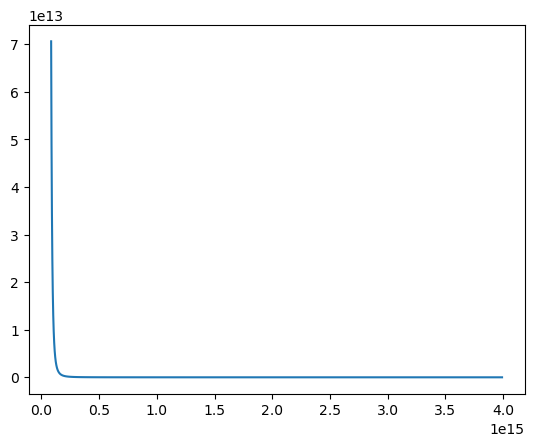

In [43]:
plt.plot(R, rho)

15.242422547840713 AU


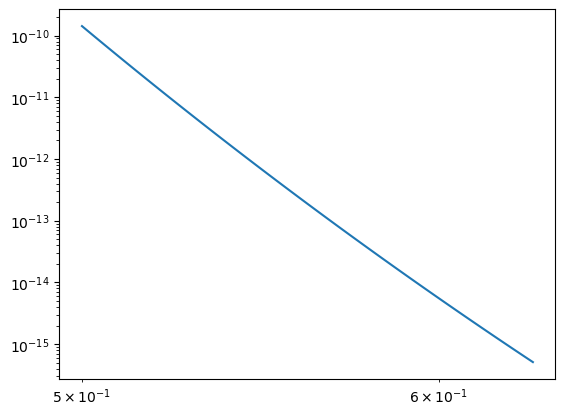

In [44]:
# Test hydrostatic density profile
R = R_s*np.logspace(0, 0.1, 100) # radial bins in multiples of R_c
rho = density_hydrostatic(R, parker_critical(a_H), R_s, rho_s)
plt.loglog(R.to(u.astronomical_unit), rho.to(u.g/(u.cm**3)))

print(parker_critical(a_H).to(u.astronomical_unit))

In [45]:
def full_density_profile(R, R_I, R_s, rho_s, a_H, a_P):
    rhop = density_profile(R, R_I, R_s, rho_s, a_H, a_P)
    rhoh = density_hydrostatic(R, parker_critical(a_H), R_s, rho_s)
    return rhop*np.heaviside(R - R_I, 1) + rhoh*np.heaviside(R_I - R, 1)

R_s:  0.5 AU
R_I:  0.5614523924159968 AU
R_c:  2.667423945872125 AU


Text(0, 0.5, 'rho')

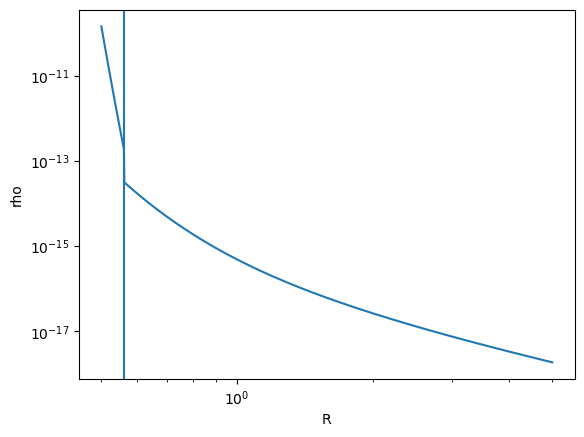

In [48]:
R = R_s*np.logspace(0, 1, 1000)#r_I*R_c*np.linspace(0.9, 1.1, 1000) # radial bins in multiples of R_c
rho = full_density_profile(R, r_I*R_c, R_s, rho_s, a_H, a_P).to(u.g/(u.cm**3))
plt.loglog(R.to(u.astronomical_unit), rho)
print("R_s: ", R_s)
print("R_I: ", r_I*R_c.to(u.astronomical_unit))
print("R_c: ", R_c.to(u.astronomical_unit))

plt.axvline(r_I*R_c.to(u.astronomical_unit).value)
plt.xlabel("R")
plt.ylabel("rho")

## Perform the integration
- Divide radially into log-spaced bins $[R^0, ..., R^i, ... R^n]$
- Invert the bin array so that $R^0$ is the largest value
- Take $X^0 = 1$
- Take $\tau_\nu^0 = 0$ 
- Find $\Gamma^0 $
- Find $X^1$ by applying ionisation-recombination balance
- Find $\tau_\nu^{i+1} = \tau_\nu^i +  n_{H} \sigma_{\nu_0} (1-X^i)(R^{i} - R^{i+1})$
- Find $\Gamma^{i+1} = \int_{13.6}^{\infty}\frac{L_{\nu} e^{-\tau_{\nu}^{i+1}}}{h\nu} \frac{\sigma_{\nu}}{4\pi d^2} d\nu$
- Find $A^{i+1} = \frac{n_H \alpha_B}{\Gamma^{i+1}}$
- Finx $X^{i+1} = \frac{-1 + \sqrt{1+4A^{i+1}}}{2A^{i+1}}$
- Repeat until $X^n$

## Parameter list:
- $r_I$ radius of ionisation front as a fraction of the parker critical radius ($R_I/R_c$)
- $M_*$ mass of the star
- $M_{BH}$ mass of the black hole
- $\dot m$ ratio of black hole accretion rate to Eddington accretion rate. (between 0 and 1)
- $R_s$ radius of the star
- $\rho_s$ density of the star at the photosphere
- $a_H$ speed of sound in the hydrostatic region ($R_* < R < R_I$)
- $a_P$ speed of sound in the parker wind region ($R > R_I$)
- $d$ distance of star to the black hole



In [23]:
T_H = 3500 * u.K # temperature in hydrostatic region
T_P= 1e4 * u.K # temperature in parker wind region

mu_H = 1 * u.g / u.mol # mean molecular weight in units of hydrogen mass
mu_P = mu_H/2

In [24]:
M_s = 1*M_sun
M_BH = 4e6 * M_sun
m_dot = 0.5
R_s = 0.5 * u.astronomical_unit
d = 0.05 * u.parsec
a_H = np.sqrt(R_gas*T_H/mu_H)
a_P = np.sqrt(R_gas*T_P/mu_P)

H = a_P**2/(G*M_s/R_s**2) # scale height
rho_s = 1/(k*H) # density at photosphere

In [25]:
R_c = parker_critical(a_P)
r_s = R_s/R_c
# r_I has to be between r_s and 1
print(r_s.decompose())
r_I = 0.2

0.18744676892241174


In [26]:
from ionisation_recombination import sigma_nu, ionisation_fraction
from EUV_flux import disk_spectrum

In [27]:
def ionisation_guess_plot(r_I, M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d):
    R_bins = 300
    R_c = parker_critical(a_P)
    R_I = r_I * R_c
    R = R_c*np.logspace(np.log10(r_I), 1, R_bins) # radial bins in multiples of R_c
    R = R[::-1] # invert radial bins
    
    n_H = (density_profile(R, R_I, R_s, rho_s, a_H, a_P)/m_p).to("m-3") # use proton mass as hydrogen mass
    
    nu_bins = 1000
    L_nu, nu = disk_spectrum(m_dot, M_BH, nu_bins)
    
    dgamma_0 = sigma_nu(nu)*L_nu/(h*nu) * 1/(4*np.pi*d**2)
    dgamma = np.ones((R_bins, nu_bins)) * np.transpose(dgamma_0)
    gamma = np.ones(R_bins) / u.s
    X = np.ones(R_bins)
    A = np.zeros(R_bins)
    tau = np.ones((R_bins, nu_bins))

    for i in range(len(R) - 1):
        dtau = (n_H[i]*sigma_nu(nu).transpose()*(1 - X[i])*(R[i] - R[i+1])).decompose()
        tau[i+1] = tau[i] + dtau
        dgamma[i+1] *= np.exp(-tau[i+1])
        gamma[i+1] = integrate.trapezoid(dgamma[i+1], nu.to("Hz"))
        A[i+1] = n_H[i]*alpha_B/gamma[i+1]
        X[i+1] = ionisation_fraction(gamma[i+1], n_H[i], alpha_B, debug = False)
    
    return R/R_c, X

In [28]:
r, X = ionisation_guess_plot(r_I, M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d)

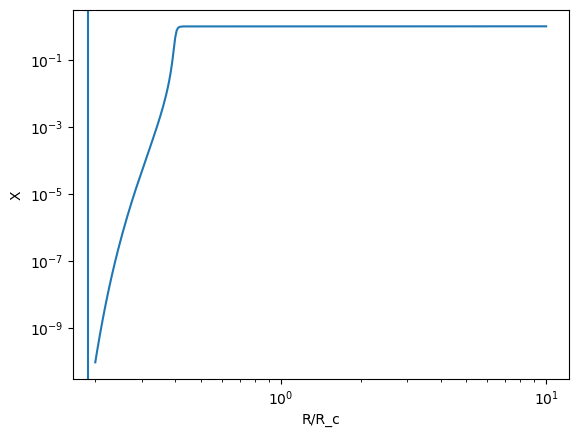

In [30]:
plt.loglog(r, X)
plt.xlabel("R/R_c")
plt.ylabel("X")
plt.axvline(r_s)

3 bins per scale height

In [32]:
def ionisation_guess(r_I, M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d):
    R_bins = 300
    R_c = parker_critical(a_P)
    R_I = r_I * R_c
    R = R_c*np.logspace(np.log10(r_I), 1, R_bins) # radial bins in multiples of R_c
    R = R[::-1] # invert radial bins
    
    n_H = (density_profile(R, R_I, R_s, rho_s, a_H, a_P)/m_p).to("m-3") # use proton mass as hydrogen mass
    
    nu_bins = 1000
    L_nu, nu = disk_spectrum(m_dot, M_BH, nu_bins)
    
    dgamma_0 = sigma_nu(nu)*L_nu/(h*nu) * 1/(4*np.pi*d**2)
    dgamma = np.ones((R_bins, nu_bins)) * np.transpose(dgamma_0)
    gamma = np.ones(R_bins) / u.s
    X = np.ones(R_bins)
    A = np.zeros(R_bins)
    tau = np.ones((R_bins, nu_bins))

    for i in range(len(R) - 1):
        dtau = (n_H[i]*sigma_nu(nu).transpose()*(1 - X[i])*(R[i] - R[i+1])).decompose()
        tau[i+1] = tau[i] + dtau
        dgamma[i+1] *= np.exp(-tau[i+1])
        gamma[i+1] = integrate.trapezoid(dgamma[i+1], nu.to("Hz"))
        A[i+1] = n_H[i]*alpha_B/gamma[i+1]
        X[i+1] = ionisation_fraction(gamma[i+1], n_H[i], alpha_B, debug = False)

    return X[-1] - 1e-4

In [38]:
print(ionisation_guess(1/5, M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d))
print(ionisation_guess(1/4, M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d))

-9.999990769457098e-05
0.9998993972556135


In [40]:
args = (M_s, M_BH, m_dot, R_s, rho_s, a_H, a_P, d)
brentq(ionisation_guess, 1/5, 1/4, args)

0.21048487372427319